[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AaronLPS/GPML/blob/master/Exercice_1_1-2.ipynb)

In [15]:
# Here we are using Python3.6
# I have tried Python3.7 and it launches errors
!pip install rdflib
!pip install pydotplus
!pip install graphviz
# this one is needed by rdflib otherwise it launches errors as well
!pip install requests

You should consider upgrading via the '/mnt/D/envs/py3.6/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/mnt/D/envs/py3.6/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/mnt/D/envs/py3.6/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/mnt/D/envs/py3.6/bin/python -m pip install --upgrade pip' command.


In [16]:
import rdflib
from rdflib import Graph
from rdflib.namespace import ClosedNamespace
from rdflib import Literal, URIRef

# for visualization
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [17]:
def visualize(g):
    """https://stackoverflow.com/questions/39274216/visualize-an-rdflib-graph-in-python"""
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))


In [18]:
# Let's define our own vocabulary
DSB = ClosedNamespace(
    uri=URIRef("https://og.dsb.org/"),
    terms=[
        "City",
        "Route",
        "connection",
        "eta",
        "type",
        "name"
    ]
)

# and add all the info
cities = [
    "Inverness",
    "Aberdeen",
    "Leuchars",
    "StAndrews",
    "Edinburgh",
    "Glasgow",
    "York",
    "Cologne",
    "Carlisle",
    "Birmingham",
    "London",
    "Brussels",
    "Toronto",
    "Winnipeg",
    "Saskatoon",
    "Edmonton",
    "Jasper",
    "Vancouver"
  ];

connections = [
    ( "Inverness", "Aberdeen", 3, 2.5 ), # A, B, eta:A->B, eta:A<-B
    ( "Aberdeen", "Leuchars", 1.5, 1 ),
    ( "Leuchars", "Edinburgh", 1.5, 3 ),
    ( "Edinburgh", "Glasgow", 1, 1 ),
    ( "Edinburgh", "York", 3.5, 4 ),
    ( "Glasgow", "Carlisle", 1, 1 ),
    ( "Carlisle", "York", 2.5, 3.5 ),
    ( "Carlisle", "Birmingham", 2.0, 1 ),
    ( "Birmingham", "London", 1.5, 2.5 ),
    ( "Leuchars", "StAndrews", 0.2, 0.2 ),
    ( "York", "London", 1.8, 2.0 ),
    ( "London", "Brussels", 2.5, 3.5 ),
    ( "Brussels", "Cologne", 2, 1.5 ),
    ( "Toronto", "Winnipeg", 36, 35 ),
    ( "Winnipeg", "Saskatoon", 12, 5 ),
    ( "Saskatoon", "Edmonton", 12, 17 ),
    ( "Edmonton", "Jasper", 6, 5 ),
    ( "Jasper", "Vancouver", 12, 13 )
]

## Basic Example
USes the custom namespace with two cities, one route and the route with an specific eta.


In [19]:
g = Graph()
# bind the dsb namespace, then it is not required when querying
g.bind("dsb", DSB)
london = DSB.City + "/London"
brussels = DSB.City + "/Brussels"

first_train = DSB.Route + "/01" 


g.add((london, DSB.type, DSB.City))
g.add((brussels, DSB.type, DSB.City))
g.add((first_train, DSB.type, DSB.Route))
g.add((first_train, DSB.eta, Literal(2.5)))

g.add((london, DSB.connection, first_train))
g.add((first_train, DSB.connection, brussels))

#print all triples
for s, p, o in g:
   print((s, p, o))

(rdflib.term.URIRef('https://og.dsb.org/Route/01'), rdflib.term.URIRef('https://og.dsb.org/connection'), rdflib.term.URIRef('https://og.dsb.org/City/Brussels'))
(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/type'), rdflib.term.URIRef('https://og.dsb.org/City'))
(rdflib.term.URIRef('https://og.dsb.org/Route/01'), rdflib.term.URIRef('https://og.dsb.org/eta'), rdflib.term.Literal('2.5', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/connection'), rdflib.term.URIRef('https://og.dsb.org/Route/01'))
(rdflib.term.URIRef('https://og.dsb.org/Route/01'), rdflib.term.URIRef('https://og.dsb.org/type'), rdflib.term.URIRef('https://og.dsb.org/Route'))
(rdflib.term.URIRef('https://og.dsb.org/City/Brussels'), rdflib.term.URIRef('https://og.dsb.org/type'), rdflib.term.URIRef('https://og.dsb.org/City'))


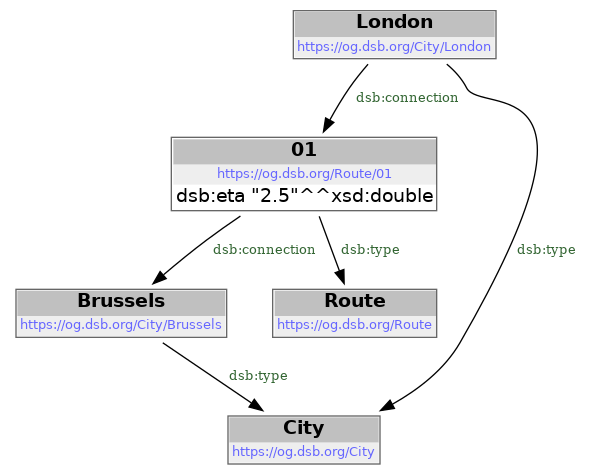

In [20]:
visualize(g)

Query how these cities are connected

In [21]:
result = g.query("""SELECT DISTINCT ?city_from ?city_to
WHERE  
{
    ?city_from dsb:type dsb:City .
    ?city_to dsb:type dsb:City .
    ?city_from dsb:connection+ ?city_to .
    
}""")
for row in result:
    print(row)

(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/Brussels'))


Same query including the estimated time

In [22]:
result = g.query("""SELECT DISTINCT ?city_from ?city_to ?eta
WHERE  
{
    ?city_from dsb:type dsb:City .
    ?city_to dsb:type dsb:City .
    ?route dsb:type dsb:Route .
    ?route dsb:eta ?eta .
    ?city_from dsb:connection [ dsb:connection ?city_to ].
}""")
for row in result:
    print(row)

(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/Brussels'), rdflib.term.Literal('2.5', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))


## Part 1
Put all cities and connections into the graph

In [23]:
g = Graph()
g.bind("dsb", DSB)

# Add cities and names
for name in cities:
    node = DSB.City + f"/{name}"

    g.add((node, DSB.type, DSB.City))
    g.add((node, DSB.name, Literal(name)))
    
# Add connections
for i, connection in enumerate(connections):
    a, b, from_a, from_b = connection
    
    # let's add some id's to the routes
    route_from_a = DSB.Route +"/" + (f"0{i*2}")[-2:] 
    route_from_b = DSB.Route +"/" + (f"0{(i*2) + 1}")[-2:] 
    
    # City id's
    city_a = DSB.City + f"/{a}"
    city_b = DSB.City + f"/{b}"
    
    # add routes
    g.add((route_from_a, DSB.type, DSB.Route))
    g.add((route_from_b, DSB.type, DSB.Route))

    # add routes eta
    g.add((route_from_a, DSB.eta, Literal(from_a)))
    g.add((route_from_b, DSB.eta, Literal(from_b)))

    # add city connection to route
    g.add((city_a, DSB.connection, route_from_a))
    g.add((city_b, DSB.connection, route_from_b))

    # add connection route to city
    g.add((route_from_a, DSB.connection, city_b))
    g.add((route_from_b, DSB.connection, city_a))

#print all triples
for s, p, o in g:
    print((s, p, o))

dsb.org/City/Glasgow'), rdflib.term.URIRef('https://og.dsb.org/name'), rdflib.term.Literal('Glasgow'))
(rdflib.term.URIRef('https://og.dsb.org/Route/03'), rdflib.term.URIRef('https://og.dsb.org/type'), rdflib.term.URIRef('https://og.dsb.org/Route'))
(rdflib.term.URIRef('https://og.dsb.org/Route/24'), rdflib.term.URIRef('https://og.dsb.org/connection'), rdflib.term.URIRef('https://og.dsb.org/City/Cologne'))
(rdflib.term.URIRef('https://og.dsb.org/City/Birmingham'), rdflib.term.URIRef('https://og.dsb.org/connection'), rdflib.term.URIRef('https://og.dsb.org/Route/16'))
(rdflib.term.URIRef('https://og.dsb.org/City/Edinburgh'), rdflib.term.URIRef('https://og.dsb.org/connection'), rdflib.term.URIRef('https://og.dsb.org/Route/08'))
(rdflib.term.URIRef('https://og.dsb.org/City/Vancouver'), rdflib.term.URIRef('https://og.dsb.org/type'), rdflib.term.URIRef('https://og.dsb.org/City'))
(rdflib.term.URIRef('https://og.dsb.org/Route/11'), rdflib.term.URIRef('https://og.dsb.org/type'), rdflib.term.UR

In [24]:
# What do we know from London?
london = DSB.City + "/London"
for p, o in g.predicate_objects(subject=london):
    print(p, o)

# Connects to 3 Routes, is a city and has the name London

https://og.dsb.org/name London
https://og.dsb.org/connection https://og.dsb.org/Route/21
https://og.dsb.org/type https://og.dsb.org/City
https://og.dsb.org/connection https://og.dsb.org/Route/22
https://og.dsb.org/connection https://og.dsb.org/Route/17


## Part 2

In [25]:
# Let's print all cities that can be reached from london, we exclude routes from London to London
result = g.query("""SELECT DISTINCT ?from ?to
WHERE  
{
    ?from dsb:type dsb:City .
    ?to dsb:type dsb:City .
    ?from dsb:name "London" .
    ?from dsb:connection+ ?to .
    FILTER (?from != ?to)
    
}""")
for row in result:
    print(row)

(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/Birmingham'))
(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/Glasgow'))
(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/Leuchars'))
(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/Inverness'))
(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/Aberdeen'))
(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/Cologne'))
(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/Brussels'))
(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/Carlisle'))
(rdflib.term.URIRef('https://og.dsb.org/City/London'), rdflib.term.URIRef('https://og.dsb.org/City/York'))
(rdf

In [26]:
# Let's print only the city names
result = g.query("""SELECT DISTINCT ?to_name
WHERE  
{
    ?from dsb:type dsb:City .
    ?to dsb:type dsb:City .

    ?from dsb:name "London" .
    
    ?from dsb:connection+ ?to .
    
    ?to dsb:name ?to_name .
    
    FILTER (?from != ?to)
}""")
for row in result:
    print(row)

(rdflib.term.Literal('Birmingham'),)
(rdflib.term.Literal('Glasgow'),)
(rdflib.term.Literal('Leuchars'),)
(rdflib.term.Literal('Inverness'),)
(rdflib.term.Literal('Aberdeen'),)
(rdflib.term.Literal('Cologne'),)
(rdflib.term.Literal('Brussels'),)
(rdflib.term.Literal('Carlisle'),)
(rdflib.term.Literal('York'),)
(rdflib.term.Literal('StAndrews'),)
(rdflib.term.Literal('Edinburgh'),)


### Bonus

In [27]:
# Not done yet, quite difficult!!!!